In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use with our MSE loss

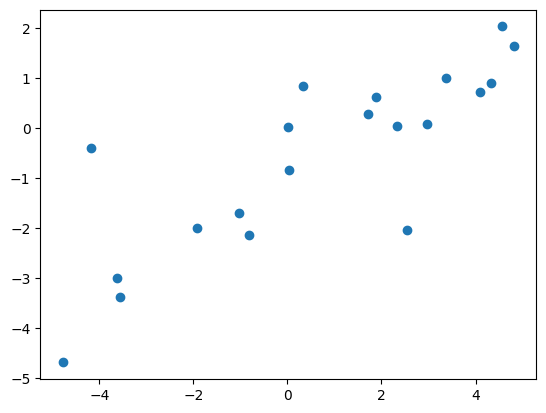

In [3]:
# Plot the data
plt.scatter(X, Y);

In [4]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [5]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [6]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [7]:
type(inputs)

torch.Tensor

In [ ]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # keep the loss so we can plot it later
    losses.append(loss.item())

    # Backward and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

In [ ]:
# Plot the loss per iteration
plt.plot(losses);

In [ ]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Error!
model(inputs).numpy()

In [ ]:
# Another way
with torch.no_grad():
    out = model(inputs).numpy()
out

In [ ]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)